# TP3 

## Amaury BURTIN

### Librairie Importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Chaos with 3 simple strategies

### Question 0 : 

In [2]:
#Parameters definition
r = ""
Lambda = ""
beta = ""

std = 1
U0 = 0

#Series definition
NIT = 100
TIME = np.arange(NIT)

#Strategy definition
g = 1
f0 = 0
f1 = g
f2 = -g
Strats = [f0,f1,f2]
S = len(Strats)

# In the next lines we define the expectation of the strategy at time t with the definition given in the lecture notes
def Expectation(s,t) :
    return(Strats[s])

# In the next lines we define the evolution of performance measure at time t with the definition given in the lecture notes
def Evolution(s,t,X,Y) :
    if t <= 0 :
        return(U0)
    else :
        Val = Evolution(s,t-1,X,Y)*(1-Lambda)
        RVt = X[t] + Y[t] - (1+r)*X[t-1]
        Val += Lambda*(RVt)*(Expectation(s,t-2)-(1+r)*X[t-1])
        return(Val)

# In the next lines we define the calculation of the fraction of population at time t with the definition given in the lecture notes
def calc(NIT,S,std,beta) :
    X = np.zeros(NIT)
    Y = np.random.normal(0,std,NIT)
    for t in range(NIT) :
        Val = 0
        SUM = 0
        for s in range(S) :
            Val += np.exp(beta*Evolution(s,t-1,X,Y))*Expectation(s,t-1)
            SUM += np.exp(beta*Evolution(s,t-1,X,Y))
        Val *= 1/(1+r)*1/SUM
        X[t] = Val
    return(X)

## Question 1

In [3]:
r = 0.01
Lambda = 0.1
beta = 1
X = calc(NIT,S,std,beta)

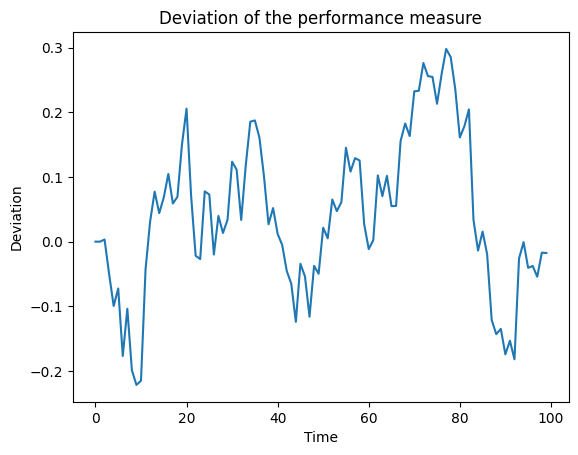

In [4]:
plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.title("Deviation of the performance measure")
plt.show()

## Question 1 Bis

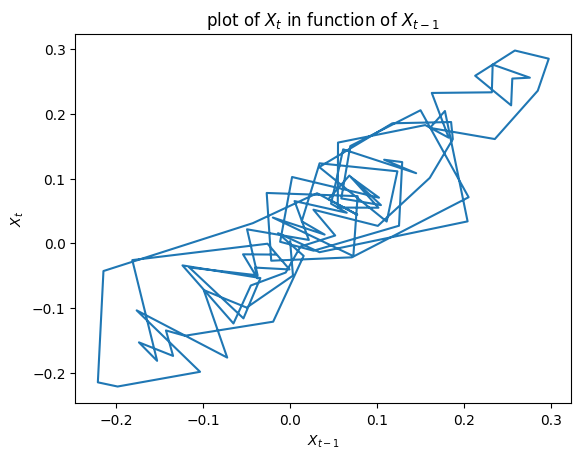

In [5]:
plt.plot(X[:NIT-1],X[1:])
plt.title("plot of $X_t$ in function of $X_{t-1}$")
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.show()

### Question 2 :

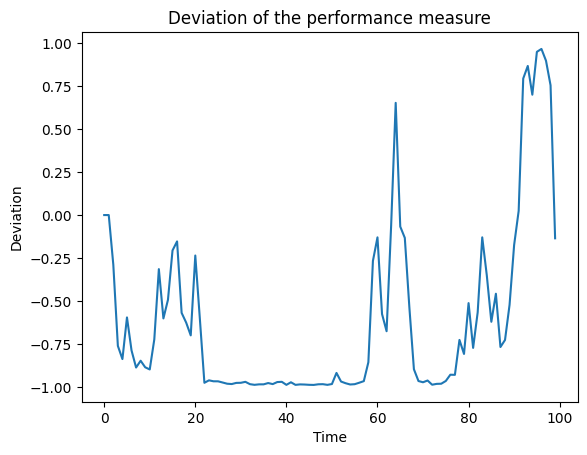

In [6]:
X = calc(NIT,S,std,10)

plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.title("Deviation of the performance measure")
plt.show()

### Question 2bis

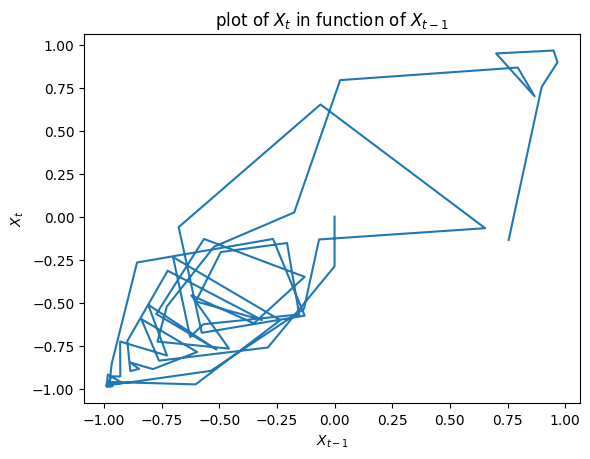

In [7]:

plt.plot(X[:NIT-1],X[1:])

plt.title("plot of $X_t$ in function of $X_{t-1}$")
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.show()

We don't get the same thing after each run, but in most cases the X_t values seem to oscillate much harder and much faster. The system seems to have become unstable after the increase in beta, not least because the beta parameter appears in the exponential and even a very small value for x give a big value at the next iteration, so x=0 is unstable. 

The higher its value, the more a certain strategy will be favored. 

### Question 3 : 

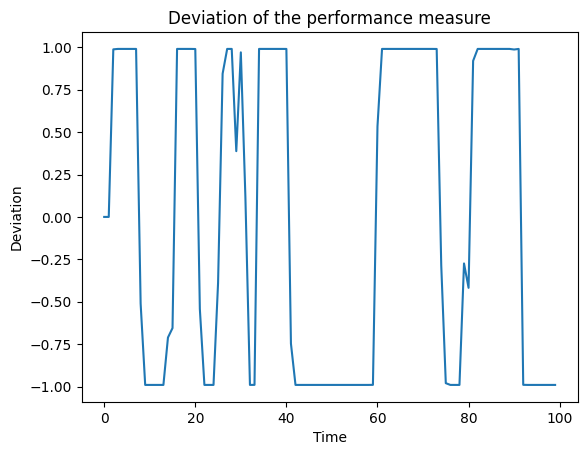

In [8]:
X = calc(NIT,S,std,100)

plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.title("Deviation of the performance measure")
plt.show()

### Question 3bis : 

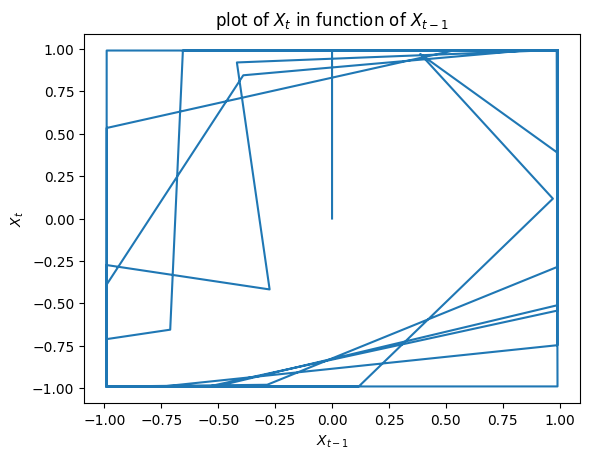

In [9]:
plt.plot(X[:NIT-1],X[1:])
plt.title("plot of $X_t$ in function of $X_{t-1}$")
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.show()

It's even worse, 0 is even more unstable, because this time there's a factor of 100 in the exponential. 

## 2. Empirical Strategies

### Question 0 : 
Implementation of the 5 strategies :

In [10]:
def Average(P,t) : #running average of the price
    if t <= 1 : 
        return(1)
    else :
        return(np.mean(P[:t]))
    
def ADA(P,t) :
    if t <= 0 :
        return(0)
    else :
        return(0.65*P[t-2] + 0.35*ADA(P,t-1))

def WTR(P,t) :
    if t <= 2 :
        return(0)
    else :
        return(1.4*P[t-2] - 0.4*P[t-3])

def STR(P,t) :
    if t <= 2 :
        return(0)
    else :
        return(2.3*P[t-2] - 1.3*P[t-3])

def LAA(P,t) :
    if t <= 2 :
        return(0)
    else :
        return(1.5*P[t-2] - 0.5*P[t-3] + 0.5*Average(P,t-2))

def AA(P,t) :
    if t <= 2 :
        return(0)
    else :
        return(1.5*P[t-2] - 0.5*P[t-3])

### Question 1 :

We're using almost the same code as before, but some functions are slightly different due to the five new strategies.

In [11]:
#Parameters definition
r = ''
Lambda = ''
beta = ''

Xinit = [1,1,1]

#Strategy definition
Strats = [ADA,WTR,STR,LAA,AA]
S = len(Strats)

def Expectation2(X,s,t) :
    """RV stands for random variable"""
    if t <= 0 :
        return(0)
    else :
        return(Strats[s](X,t))

def Evolution2(s,t,X,Y) :
    if t <= 0 :
        return(U0)
    else :
        Val = Evolution2(s,t-1,X,Y)*(1-Lambda)
        RVt = X[t] + Y[t] - (1+r)*X[t-1]
        Val += Lambda*(RVt)*(Expectation2(X,s,t-2)-(1+r)*X[t-1])
        return(Val)

def calc2(NIT,S,std,beta,Xinit) :
    X = np.zeros(NIT)
    X[0] = Xinit[0]
    X[1] = Xinit[1]
    X[2] = Xinit[2]
    Y = np.random.normal(0,std,NIT)
    for t in range(3,NIT) :
        Val = 0
        SUM = 0
        for s in range(S) :
            Val += np.exp(beta*Evolution2(s,t-1,X,Y))*Expectation2(X,s,t-1)
            SUM += np.exp(beta*Evolution2(s,t-1,X,Y))
        Val *= 1/(1+r)*1/SUM
        X[t] = Val
    return(X)

In [12]:
r = 0.01
Lambda = 0.1
beta = 1
X = calc2(NIT,S,std,beta,Xinit)

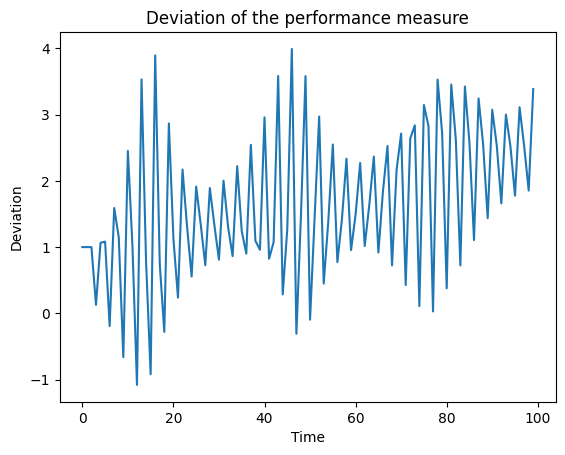

In [13]:
plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.title("Deviation of the performance measure")
plt.show()

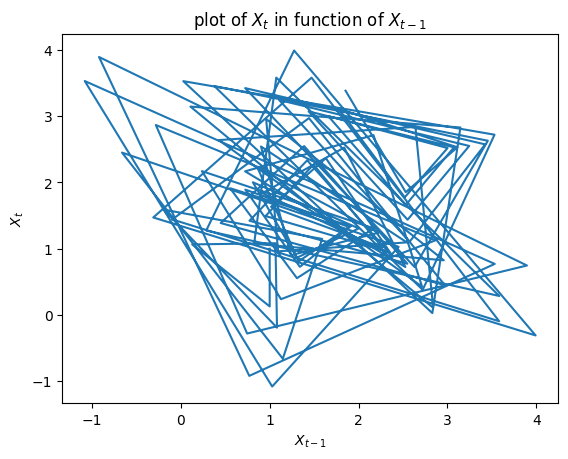

In [14]:
plt.plot(X[:NIT-1],X[1:])
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.title("plot of $X_t$ in function of $X_{t-1}$")
plt.show() 

With the previous values, the mix of the 5 strategies seems to lead to a situation which is relatively stable, the variations between $x_t$ and $x_{t-1}$ are less strong than in part 1 with Beta = 10 and beta = 100.

In [15]:
#Lets plot the same graphe, but for high r, high lambda and high beta (independantly)
beta = 1
Lambda = 1
r = 0.01
X = calc2(NIT,S,std,beta,Xinit)

/var/folders/5c/yxqnw4kx1bg4xfngl1_rcl0r0000gn/T/ipykernel_64082/2006796274.py:38: RuntimeWarning: overflow encountered in exp
  Val += np.exp(beta*Evolution2(s,t-1,X,Y))*Expectation2(X,s,t-1)
/var/folders/5c/yxqnw4kx1bg4xfngl1_rcl0r0000gn/T/ipykernel_64082/2006796274.py:39: RuntimeWarning: overflow encountered in exp
  SUM += np.exp(beta*Evolution2(s,t-1,X,Y))
/var/folders/5c/yxqnw4kx1bg4xfngl1_rcl0r0000gn/T/ipykernel_64082/2006796274.py:40: RuntimeWarning: invalid value encountered in scalar multiply
  Val *= 1/(1+r)*1/SUM


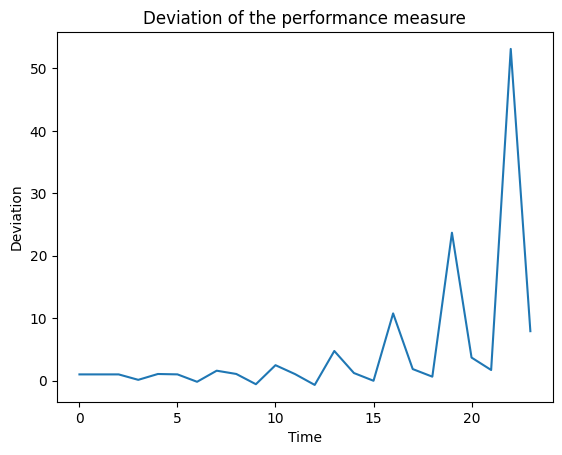

In [16]:
plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.title("Deviation of the performance measure")
plt.show()

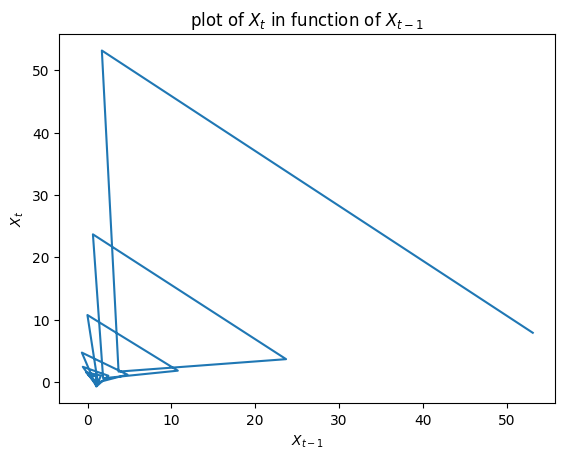

In [17]:
plt.plot(X[:NIT-1],X[1:])
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.title("plot of $X_t$ in function of $X_{t-1}$")
plt.show() 

With these values the system diverges even worse than in the last question of part 1.

In [18]:
beta = 1
Lambda = 0.1
r = 1
X = calc2(NIT,S,std,beta,Xinit)

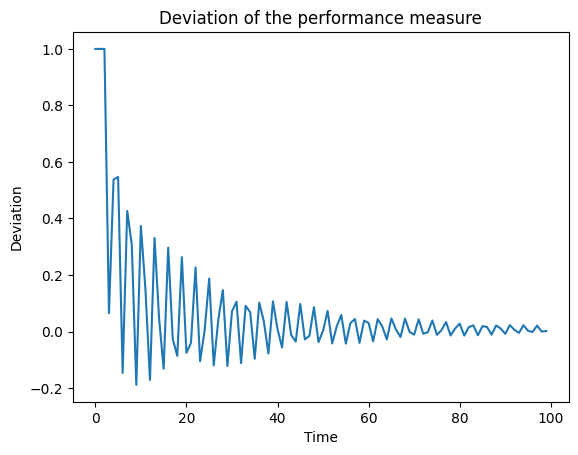

In [19]:
plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.title("Deviation of the performance measure")
plt.show()



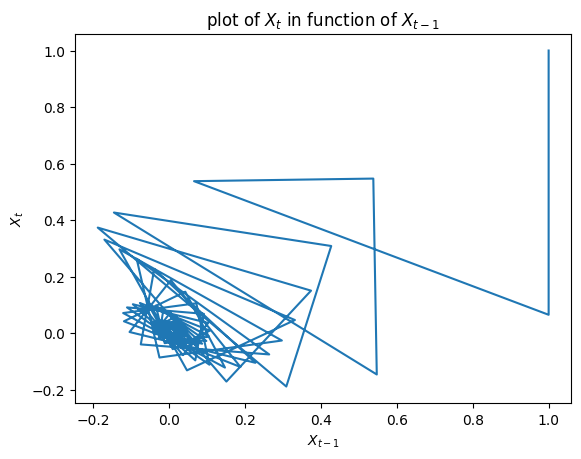

In [20]:
plt.plot(X[:NIT-1],X[1:])
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.title("plot of $X_t$ in function of $X_{t-1}$")
plt.show() 

With these values, the system converges very quickly and appears stable. 

In [21]:
beta = 100
Lambda = 0.1
r = 0.01
X = calc2(NIT,S,std,beta,Xinit)


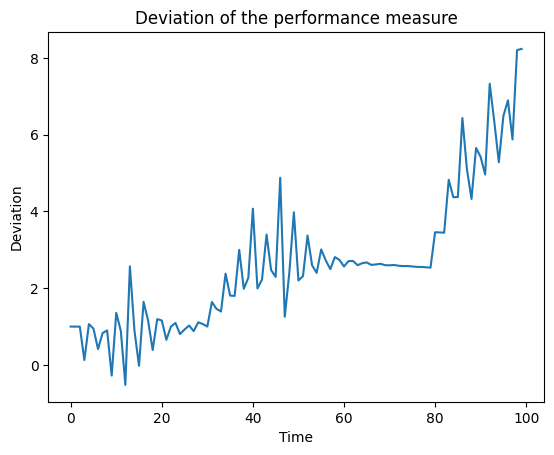

In [22]:
plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.title("Deviation of the performance measure")
plt.show()

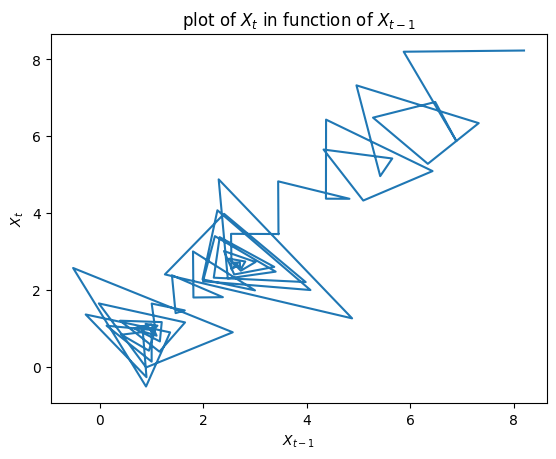

In [23]:
plt.plot(X[:NIT-1],X[1:])
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.title("plot of $X_t$ in function of $X_{t-1}$")
plt.show() 

Finally, with these values, the system seems to diverge, but at a slower rate; some values seem to be points of unstable equilibrium in the system.

**Conclusion**

One can notice that the only stable model is for high r. High lambda means high absolute value in the exponential, even negative values, which is interpreted as 0. Zero division error therefore occurs. High beta means fostering a specific strategy over the others, but the preferred strategy can change. This explains the transitions between oscillating periods of time. 

### Question 2

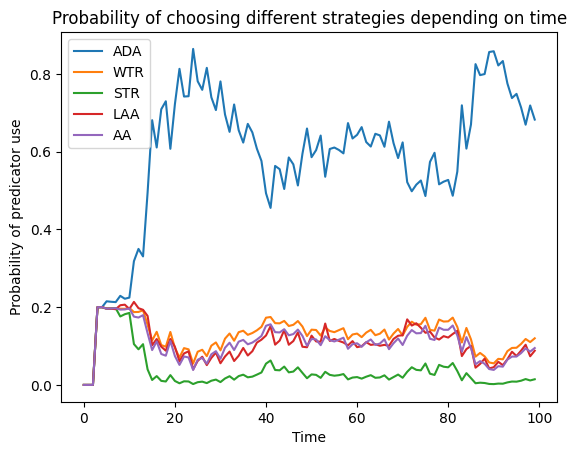

In [24]:
r = 0.01
Lambda = 0.1
std = 1
beta = 1
n = np.zeros((5,NIT))

def calc(NIT,S,std,beta,Xinit) :
    X = np.zeros(NIT)
    X[0] = Xinit[0]
    X[1] = Xinit[1]
    X[2] = Xinit[2]
    Y = np.random.normal(0,std,NIT)
    for t in range(3,NIT) :
        Val = 0
        SUM = 0
        for s in range(S) :
            Val += np.exp(beta*Evolution2(s,t-1,X,Y))*Expectation2(X,s,t-1)
            SUM += np.exp(beta*Evolution2(s,t-1,X,Y))
            n[s,t] = np.exp(beta*Evolution2(s,t-1,X,Y))
        n[:,t]/=SUM
        Val *= 1/(1+r)*1/SUM
        X[t] = Val
    return(X,n)

X,n = calc(NIT,S,std,beta,Xinit)

plt.plot(n[0],label="ADA")
plt.plot(n[1],label="WTR")
plt.plot(n[2],label="STR")
plt.plot(n[3],label="LAA")
plt.plot(n[4],label="AA")
plt.title("Probability of choosing different strategies depending on time")
plt.xlabel("Time")
plt.ylabel("Probability of predicator use")
plt.legend()
plt.show()

The STR strategy seems to be the worst, followed by the LAA, WTR and AA strategies, and the ADA strategy the best. In all cases, we find a kind of periodicity for all 5 models, with a roughly similar period of around 20 days.

## 3.Technical analysis

In [25]:
#Parameters definition
r = ""
Lambda =""
beta = ""

def Moving_Average(M,t,p=5) :
    '''
    Function that compute the moving average of a serie R, with a window of size k at point i 
    R -> np.array
    k -> int
    i -> int
    '''
    if p>t : 
        return(np.mean(M[:t]))
    else : 
        return(np.mean(M[t-p:t]))

def f0_bis(t,X,alpha =1/3,theta=8,p=2) :
    if t <= theta :
        return((1+1/theta)*X[t-1])
    else :
        return((1+1/theta)*X[t-1]-X[t-theta])

def f1_bis(t,X,alpha =1/3,theta=8,p=2) :
    #print(2*X[t-1]-Moving_Average(X,t))
    return(2*X[t-1]-Moving_Average(X,t))

def f2_bis(t,X,alpha =1/3,theta=8,p=2) :
    if t <= 1 :
        return(U0)
    if t <= 2 :
        return(U0)
    else :
        return(X[t-1]+alpha*(X[t-1]-X[t-2])-(1-alpha)*X[t-3])

Strats = [f0_bis,f1_bis,f2_bis]
S = len(Strats)

def Expectation(s,t,alpha =1/3,theta=3,p=5) :
    """RV stands for random variable"""
    if t <= 0 :
        return(0)
    else :
        return(Strats[s](t,X,alpha =1/3,theta=3,p=5))

def Evolution(s,t,X,Y) :
    if t <= 0 :
        return(U0)
    else :
        Val = Evolution(s,t-1,X,Y)*(1-Lambda)
        RVt = X[t] + Y[t] - (1+r)*X[t-1]
        Val += Lambda*(RVt)*Expectation(s,t-2)-(1+r)*X[t-1]
        return(Val)

def calc(NIT,S,std,beta) :
    X = np.zeros(NIT)
    Y = np.random.normal(0,std,NIT)
    for t in range(NIT) :
        Val = 0
        SUM = 0
        for s in range(S) :
            Val += np.exp(beta*Evolution(s,t-1,X,Y))*Expectation(s,t-1)
            SUM += np.exp(beta*Evolution(s,t-1,X,Y))
        Val *= 1/(1+r)*1/SUM
        X[t] = Val
    return(X)



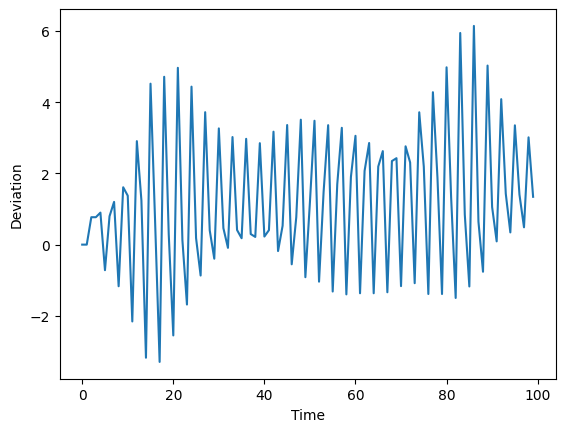

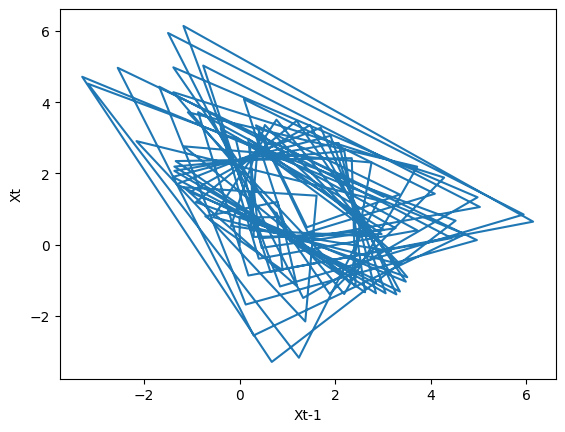

In [26]:
r = 0.01
Lambda = 0.1
beta = 1

X = calc(NIT,S,std,beta)

plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.show()

plt.plot(X[:NIT-1],X[1:])
plt.xlabel("Xt-1")
plt.ylabel("Xt")
plt.show()


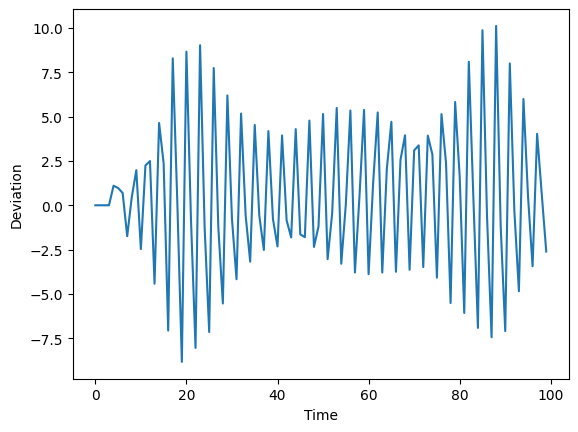

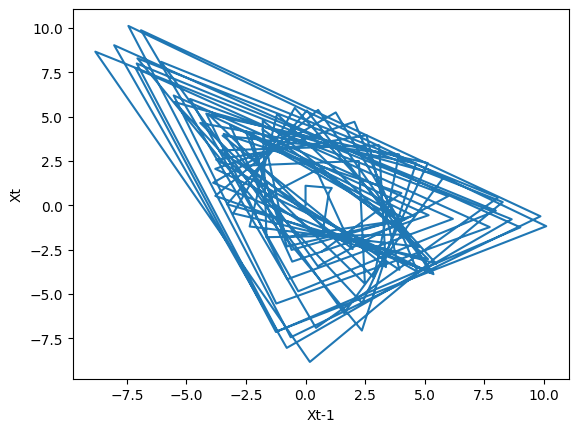

In [27]:
beta = 1
Lambda = 1
r = 0.01

X = calc(NIT,S,std,beta)

plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.show()

plt.plot(X[:NIT-1],X[1:])
plt.xlabel("Xt-1")
plt.ylabel("Xt")
plt.show()

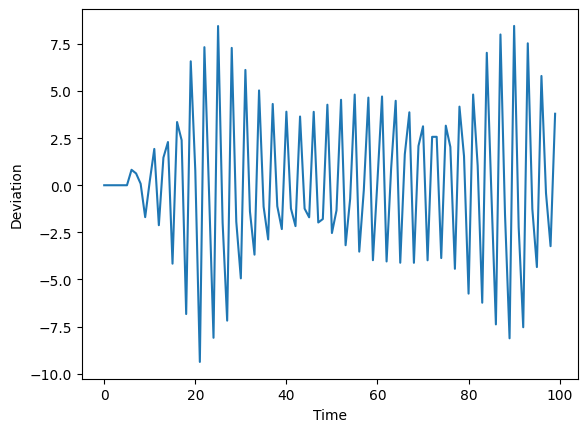

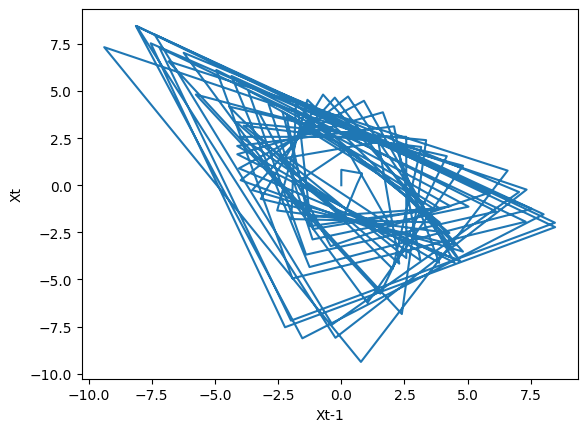

In [28]:
beta = 1
Lambda = 0.1
r = 1

X = calc(NIT,S,std,beta)

plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.show()

plt.plot(X[:NIT-1],X[1:])
plt.xlabel("Xt-1")
plt.ylabel("Xt")
plt.show()

/var/folders/5c/yxqnw4kx1bg4xfngl1_rcl0r0000gn/T/ipykernel_64082/504318478.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  Val *= 1/(1+r)*1/SUM
/var/folders/5c/yxqnw4kx1bg4xfngl1_rcl0r0000gn/T/ipykernel_64082/504318478.py:64: RuntimeWarning: invalid value encountered in scalar multiply
  Val *= 1/(1+r)*1/SUM


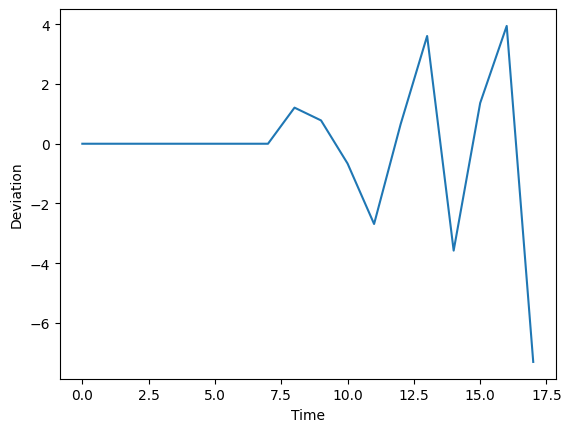

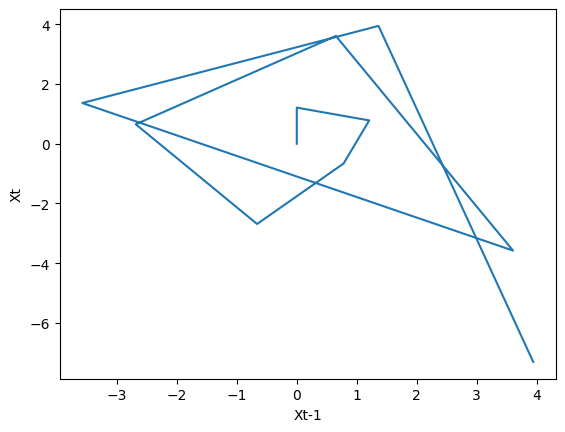

In [29]:
beta = 100
Lambda = 0.1
r = 0.01

X = calc(NIT,S,std,beta)

plt.plot(TIME,X)
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.show()

plt.plot(X[:NIT-1],X[1:])
plt.xlabel("Xt-1")
plt.ylabel("Xt")
plt.show()

Overall, with these linear predictors, the strategies seem more stable than before. Too high a beta still poses a problem

# Question 2 

Keep beta values relatively low to avoid divergence problems 